#

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
# 读取数据
douban_file_path = 'douban_top250.csv'
imdb_file_path = 'imdb_top_250_movies.csv'


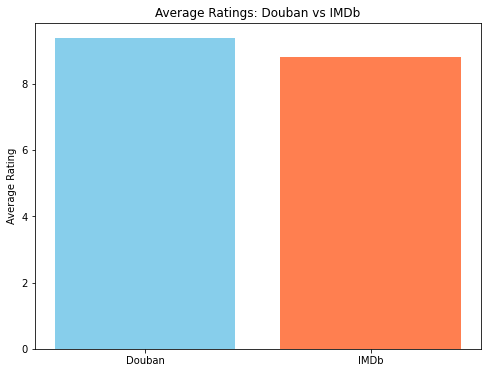

In [12]:
douban_data = pd.read_csv(douban_file_path)
imdb_data = pd.read_csv(imdb_file_path)

#1. 平台平均评分比较
douban_avg_rating = douban_data['rating'].mean()
imdb_avg_rating = imdb_data['rating'].mean()

# 可视化平均评分比较
platforms = ['Douban', 'IMDb']
ratings = [douban_avg_rating, imdb_avg_rating]

plt.figure(figsize=(8, 6))
plt.bar(platforms, ratings, color=['skyblue', 'coral'])
plt.title('Average Ratings: Douban vs IMDb')
plt.ylabel('Average Rating')
plt.show()

# 创建中英文标题映射
title_mapping = {
    '肖申克的救赎': 'The Shawshank Redemption',
    '阿甘正传': 'Forrest Gump',
    '泰坦尼克号': 'Titanic',
    '千与千寻': 'Spirited Away',
    '美丽人生': 'Life Is Beautiful',
    '这个杀手不太冷': 'Leon: The Professional',
    '星际穿越': 'Interstellar',
    '盗梦空间': 'Inception',
    '辛德勒的名单': "Schindler's List",
    '无间道': "Infernal Affairs",
    '三傻大闹宝莱坞': "3 Idiots"
}


Movies appearing on both platforms:
Empty DataFrame
Columns: [title, rating_x, rating_y, year]
Index: []

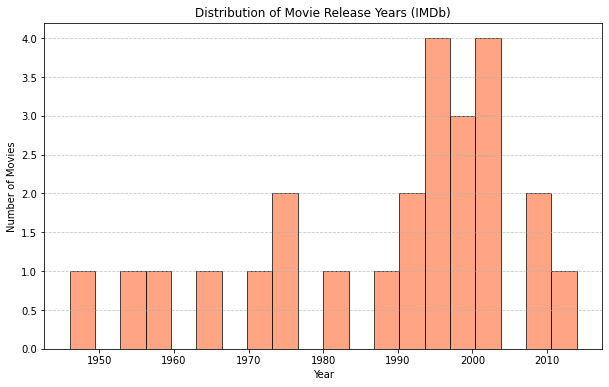

In [13]:

douban_data['mapped_title'] = douban_data['title'].map(title_mapping)
overlap_movies = pd.merge(douban_data, imdb_data, left_on='mapped_title', right_on='movie_title', how='inner')

print("Movies appearing on both platforms:")
print(overlap_movies[['title', 'rating_x', 'rating_y', 'year']])

# 上映年份分布 
plt.figure(figsize=(10, 6))
plt.hist(imdb_data['year'], bins=20, color='coral', alpha=0.7, edgecolor='black')
plt.title('Distribution of Movie Release Years (IMDb)')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 4. 类型分布
if 'genre' in imdb_data.columns:
    # 拆分类型列并统计分布
    genre_series = imdb_data['genre'].str.split(',').explode()
    genre_counts = genre_series.value_counts().head(10)  # 显示Top 10类型

    plt.figure(figsize=(10, 6))
    genre_counts.plot(kind='bar', color='skyblue', edgecolor='black')
    plt.title('Top 10 Movie Genres (IMDb)')
    plt.xlabel('Genre')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()
